In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17779866786513138910
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16152002560
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2881254874222591395
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


2022-04-24 17:37:36.604222: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-24 17:37:36.664198: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:36.750204: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:36.750995: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA 

In [2]:
import tensorflow as tf

In [3]:
tf.test.gpu_device_name()

2022-04-24 17:37:38.782834: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:38.783654: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:38.784303: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:38.785105: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:38.785847: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

'/device:GPU:0'

In [4]:
import os, shutil

In [5]:
original_dataset_dir = 'train'
base_dir = './Cats_Dogs'
os.mkdir(base_dir)

In [6]:
import os
import zipfile

local_zip = '../input/dogs-vs-cats/train.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('')
zip_ref.close()

In [7]:
ls

Cats_Dogs/  __notebook__.ipynb  train/


In [8]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [9]:
train_cats_dir = os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

In [10]:
validation_cats_dir = os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

In [11]:
test_cats_dir = os.path.join(test_dir,'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [12]:
# Copies first 1000 cats images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
# Copies next 500 cats images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
# Copies next 500 cats images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [15]:
# Copies first 1000 dogs images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [16]:
# Copies next 500 dogs images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [17]:
# Copies next 500 dogs images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

### Sanity check

In [18]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))
print('total training dog images: ', len(os.listdir(train_dogs_dir)))
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))
print('total test cat images: ', len(os.listdir(test_cats_dir)))
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total training cat images:  1000
total training dog images:  1000
total validation cat images:  500
total validation dog images:  500
total test cat images:  500
total test dog images:  500


### Building the network

In [19]:
from keras import layers
from keras import models

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

2022-04-24 17:37:54.255038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:54.255977: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:54.256611: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:54.257543: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-24 17:37:54.258222: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [22]:
from tensorflow.keras import optimizers

In [23]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### Datapreprocessing

In [24]:
from keras.preprocessing.image import ImageDataGenerator

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150), ## Resized all images to 150 X 150
    batch_size=20,
    class_mode='binary' ## Because you are using binary_crossentropy loss, you need binary labels
)

Found 2000 images belonging to 2 classes.


In [27]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150), ## Resized all images to 150 X 150
    batch_size=20,
    class_mode='binary' ## Because you are using binary_crossentropy loss, you need binary labels
)

Found 1000 images belonging to 2 classes.


In [28]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


### Fitting the model using batch generator

In [29]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
2022-04-24 17:37:58.074322: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-04-24 17:37:59.931305: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


100/100 [==============================] - 15s 80ms/step - loss: 0.6897 - acc: 0.5245 - val_loss: 0.6721 - val_acc: 0.6060
Epoch 2/30
100/100 [==============================] - 8s 79ms/step - loss: 0.6635 - acc: 0.5985 - val_loss: 0.6463 - val_acc: 0.6260
Epoch 3/30
100/100 [==============================] - 8s 80ms/step - loss: 0.6187 - acc: 0.6645 - val_loss: 0.6029 - val_acc: 0.6770
Epoch 4/30
100/100 [==============================] - 8s 76ms/step - loss: 0.5717 - acc: 0.7005 - val_loss: 0.5915 - val_acc: 0.6730
Epoch 5/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5340 - acc: 0.7325 - val_loss: 0.7016 - val_acc: 0.6120
Epoch 6/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5060 - acc: 0.7475 - val_loss: 0.5721 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 8s 76ms/step - loss: 0.4793 - acc: 0.7670 - val_loss: 0.6199 - val_acc: 0.6810
Epoch 8/30
100/100 [==============================] - 8s 82ms/step - loss: 0.44

In [30]:
model.save('cats_dogs_small1.h5')

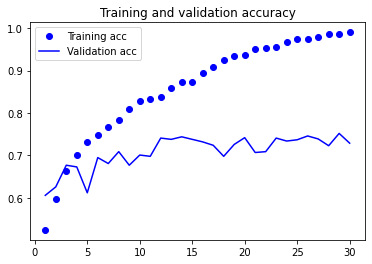

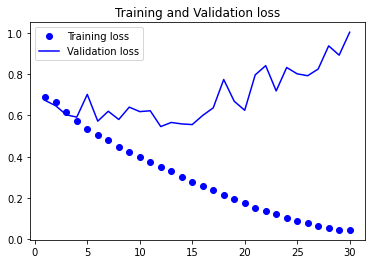

In [31]:
### Displaying curves of loss and accuracy during training
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### Data augmentation

In [32]:
datagen = ImageDataGenerator(
rotation_range = 40,
width_shift_range = 0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

In [33]:
from keras.preprocessing import image ## module with image preprocessing utilities

In [34]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

In [35]:
img_path = fnames[3]

In [36]:
img = image.load_img(img_path, target_size=(150,150)) 

In [37]:
x = image.img_to_array(img) ## Converts it to a numpy array with shape (150,150,3)

In [38]:
x = x.reshape((1,) + x.shape) ## Reshapes it to (1,150,150,3)

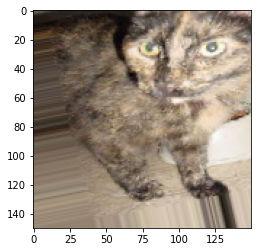

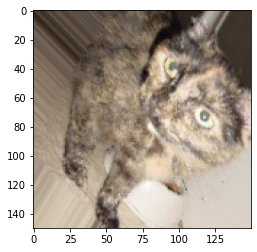

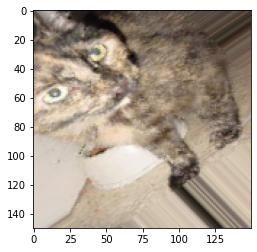

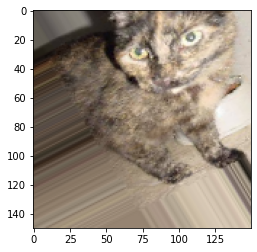

In [39]:
i = 0
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
        
plt.show()

In [40]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',
             optimizer = optimizers.RMSprop(lr=1e-4),
             metrics=['acc'])

In [42]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range = 40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [43]:
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150),batch_size=32,class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [44]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=63,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=32)

Epoch 1/100
63/63 [==============================] - 17s 256ms/step - loss: 0.6946 - acc: 0.5055 - val_loss: 0.6870 - val_acc: 0.5010
Epoch 2/100
63/63 [==============================] - 17s 270ms/step - loss: 0.6859 - acc: 0.5485 - val_loss: 0.6737 - val_acc: 0.5940
Epoch 3/100
63/63 [==============================] - 16s 258ms/step - loss: 0.6825 - acc: 0.5660 - val_loss: 0.6607 - val_acc: 0.6290
Epoch 4/100
63/63 [==============================] - 17s 276ms/step - loss: 0.6695 - acc: 0.5745 - val_loss: 0.6468 - val_acc: 0.6230
Epoch 5/100
63/63 [==============================] - 16s 250ms/step - loss: 0.6591 - acc: 0.5950 - val_loss: 0.6408 - val_acc: 0.6280
Epoch 6/100
63/63 [==============================] - 17s 274ms/step - loss: 0.6369 - acc: 0.6445 - val_loss: 0.7409 - val_acc: 0.5540
Epoch 7/100
63/63 [==============================] - 16s 249ms/step - loss: 0.6289 - acc: 0.6315 - val_loss: 0.6209 - val_acc: 0.6480
Epoch 8/100
63/63 [==============================] - 17s 276ms

In [45]:
 model.save('cats_dogs_small2_da.h5')

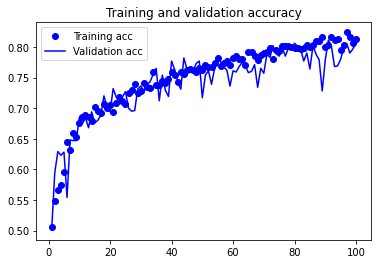

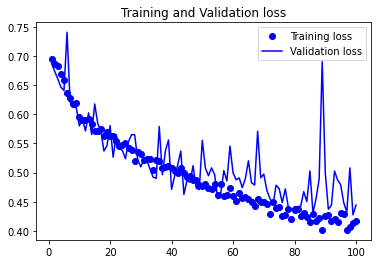

In [46]:
### Displaying curves of loss and accuracy during training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

### VGG16 convolutional base

In [47]:
from keras.applications.vgg16 import VGG16

In [48]:
conv_base = VGG16(weights='imagenet',
                 include_top = False,
                 input_shape=(150,150,3))

58900480/58889256 [==============================] - 0s 0us/step


In [49]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [50]:
## Extracting features using the pretrained convolutional base
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

In [51]:
base_dir = 'Cats_Dogs'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
#         print(features_batch.shape)
        features[i * batch_size : (i+1) * batch_size] = features_batch
        labels[i * batch_size : (i+1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

In [52]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir,1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [53]:
train_features.shape

(2000, 4, 4, 512)

In [54]:
## Defining and training the densly connected classifier

In [55]:
from keras import models
from keras import layers
from tensorflow.keras import optimizers

In [56]:
## flattenging the 4*4*512 images to 8192
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features, (1000, 4*4*512))

In [57]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim = 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))


In [58]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

In [59]:
history = model.fit(train_features,
                    train_labels,
                    epochs = 30, 
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 6ms/step - loss: 0.6161 - acc: 0.6400 - val_loss: 0.4490 - val_acc: 0.8280
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4322 - acc: 0.8020 - val_loss: 0.3683 - val_acc: 0.8520
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3606 - acc: 0.8410 - val_loss: 0.3277 - val_acc: 0.8690
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3189 - acc: 0.8775 - val_loss: 0.3012 - val_acc: 0.8890
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2936 - acc: 0.8815 - val_loss: 0.2905 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2620 - acc: 0.8930 - val_loss: 0.2760 - val_acc: 0.8890
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2469 - acc: 0.9070 - val_loss: 0.2669 - val_acc: 0.8990
Epoch 8/30
100/100 [==============================] - 0s 4ms/step - loss: 0.

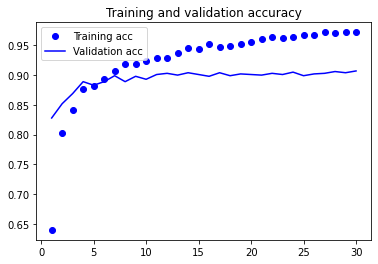

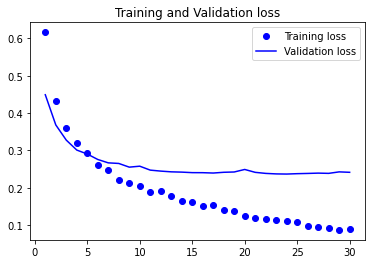

In [60]:
### Displaying curves of loss and accuracy during training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [61]:
## Adding a densly connected classifier on top of the convolutional base
from keras import models
from keras import layers

In [62]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [63]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [64]:
print('This is the number of trainable weights before freezing the conv base: ', len(model.trainable_weights))
conv_base.trainable = False

This is the number of trainable weights before freezing the conv base:  30


In [65]:
print('This is the number of trainable weights after freezing the conv base: ', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base:  4


In [66]:
## Training the model end to end with a frozen convolutional base
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest'
                                  )

In [67]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=20,
                                                   class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=20,
                                                       class_mode='binary')
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=2e-5),
             metrics=['acc'])

history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=30,
                             validation_data=validation_generator,
                             validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 18s 175ms/step - loss: 0.5927 - acc: 0.6925 - val_loss: 0.4573 - val_acc: 0.8110
Epoch 2/30
100/100 [==============================] - 20s 201ms/step - loss: 0.4925 - acc: 0.7745 - val_loss: 0.3810 - val_acc: 0.8380
Epoch 3/30
100/100 [==============================] - 17s 171ms/step - loss: 0.4426 - acc: 0.8000 - val_loss: 0.3408 - val_acc: 0.8640
Epoch 4/30
100/100 [==============================] - 20s 200ms/step - loss: 0.4061 - acc: 0.8140 - val_loss: 0.3076 - val_acc: 0.8760
Epoch 5/30
100/100 [==============================] - 18s 179ms/step - loss: 0.3865 - acc: 0.8275 - val_loss: 0.2926 - val_acc: 0.8800
Epoch 6/30
100/100 [==============================] - 19s 192ms/step - loss: 0.3610 - acc: 0.8505 - val_loss: 0.2790 - val_acc: 0.8850
Epoch 7/30
100/100 [==============================] - 18s 179ms/step - loss: 0.3459 - acc: 0.8535 - val_lo

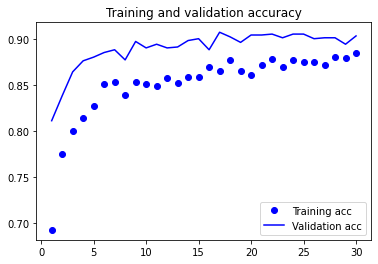

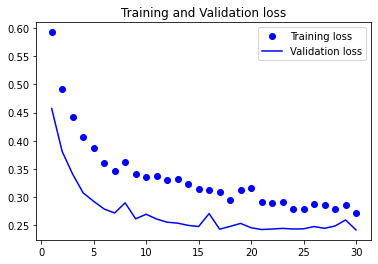

In [68]:
### Displaying curves of loss and accuracy during training
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [69]:
## Fine tuning conv_base
conv_base.trainable = True

In [70]:
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [71]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

In [72]:
history = model.fit_generator(train_generator,
                             steps_per_epoch=100,
                             epochs=100,
                             validation_data=validation_generator,
                             validation_steps=50)

Epoch 1/100
100/100 [==============================] - 19s 185ms/step - loss: 0.2782 - acc: 0.8800 - val_loss: 0.2445 - val_acc: 0.8980
Epoch 2/100
100/100 [==============================] - 20s 204ms/step - loss: 0.2635 - acc: 0.8885 - val_loss: 0.2216 - val_acc: 0.9110
Epoch 3/100
100/100 [==============================] - 18s 180ms/step - loss: 0.2466 - acc: 0.8975 - val_loss: 0.2056 - val_acc: 0.9200
Epoch 4/100
100/100 [==============================] - 20s 202ms/step - loss: 0.2102 - acc: 0.9085 - val_loss: 0.2146 - val_acc: 0.9210
Epoch 5/100
100/100 [==============================] - 18s 183ms/step - loss: 0.2048 - acc: 0.9205 - val_loss: 0.1951 - val_acc: 0.9270
Epoch 6/100
100/100 [==============================] - 21s 206ms/step - loss: 0.1910 - acc: 0.9195 - val_loss: 0.1872 - val_acc: 0.9270
Epoch 7/100
100/100 [==============================] - 18s 176ms/step - loss: 0.1732 - acc: 0.9310 - val_loss: 0.1998 - val_acc: 0.9230
Epoch 8/100
100/100 [===========================

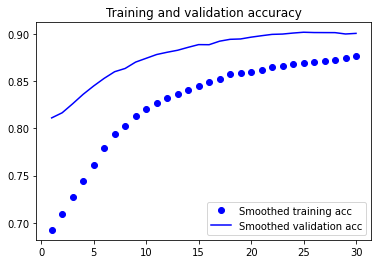

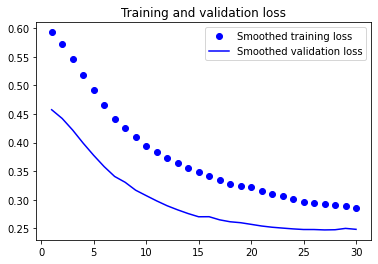

In [73]:
## Smoothing the plots
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous*factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs, smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs, smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, smooth_curve(loss),'bo', label='Smoothed training loss')
plt.plot(epochs, smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [74]:
test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size=(150,150),
                                                  batch_size=20,
                                                  class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test acc: ', test_acc)

Found 1000 images belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test acc:  0.9290000200271606
